In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
drug=pd.read_csv('../input/drug-classification/drug200.csv')
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
drug['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [4]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

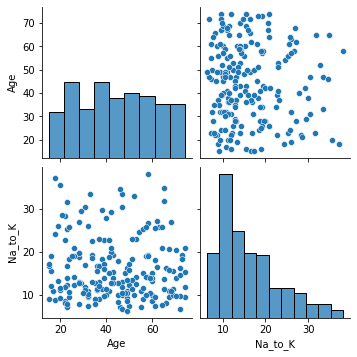

In [6]:
sns.pairplot(drug)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

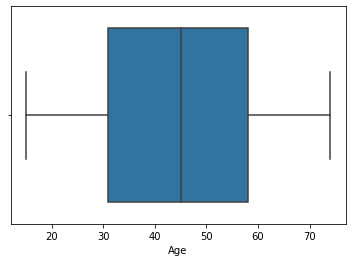

In [7]:
sns.boxplot('Age',data=drug)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Na_to_K'>

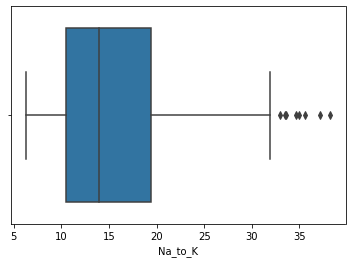

In [8]:
sns.boxplot('Na_to_K',data=drug)

In [9]:
drug.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [10]:
drug['Sex']=drug['Sex'].astype('category')
drug['Sex']=drug['Sex'].cat.codes
drug=pd.get_dummies(drug,columns=['Sex'])

In [11]:
drug['BP']=drug['BP'].astype('category')
drug['BP']=drug['BP'].cat.codes
drug=pd.get_dummies(drug,columns=['BP'])

In [12]:
drug['Cholesterol']=drug['Cholesterol'].astype('category')
drug['Cholesterol']=drug['Cholesterol'].cat.codes
drug=pd.get_dummies(drug,columns=['Cholesterol'])

In [13]:
drug.drop(['Sex_0','BP_0','Cholesterol_0'],axis=1,inplace=True)

In [14]:
drug.head()

,Age,Na_to_K,Drug,Sex_1,BP_1,BP_2,Cholesterol_1
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,DrugY,0,1,0,0


In [15]:
x=drug.drop(['Drug'],axis=1)
y=drug['Drug']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=401)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 6)
(50, 6)
(150,)
(50,)


# LOGISTIC REGRESSION 

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logit=LogisticRegression()
logit.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [19]:
y_pred_train=logit.predict(x_train)
y_pred_test=logit.predict(x_test)

In [20]:
logit.coef_

array([[-4.84342776e-02,  5.25310097e-01,  6.58474825e-01,
        -3.20988054e-01, -4.49787329e-05, -3.01938875e-01],
       [-2.38338984e-02,  2.10111428e-02,  4.52309100e-01,
        -2.23343768e+00, -1.42216481e+00,  1.14663559e-01],
       [ 8.43442394e-02, -2.06058688e-01, -5.86806159e-01,
        -2.16002184e+00, -1.41742079e+00,  3.16838828e-01],
       [-6.62158356e-03, -1.16751061e-01,  1.41524975e-01,
         2.54767446e+00, -7.44380641e-01, -1.76547150e+00],
       [-5.45447986e-03, -2.23511491e-01, -6.65502741e-01,
         2.16677311e+00,  3.58401122e+00,  1.63590798e+00]])

In [21]:
logit.intercept_

array([-3.8355809 ,  1.93395551, -0.71723175,  0.76153131,  1.85732583])

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
print(confusion_matrix(y_train,y_pred_train))
print('*****')
print(confusion_matrix(y_test,y_pred_test))

[[65  0  0  0  2]
 [ 2 14  2  0  0]
 [ 1  2  9  0  0]
 [ 2  0  0  9  0]
 [ 1  0  0  0 41]]
*****
[[22  0  1  0  1]
 [ 1  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  5  0]
 [ 2  0  0  0 10]]


In [24]:
print(classification_report(y_train, y_pred_train))
print("\n")
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       DrugY       0.92      0.97      0.94        67
       drugA       0.88      0.78      0.82        18
       drugB       0.82      0.75      0.78        12
       drugC       1.00      0.82      0.90        11
       drugX       0.95      0.98      0.96        42

    accuracy                           0.92       150
   macro avg       0.91      0.86      0.88       150
weighted avg       0.92      0.92      0.92       150



              precision    recall  f1-score   support

       DrugY       0.88      0.92      0.90        24
       drugA       1.00      0.80      0.89         5
       drugB       0.80      1.00      0.89         4
       drugC       1.00      1.00      1.00         5
       drugX       0.91      0.83      0.87        12

    accuracy                           0.90        50
   macro avg       0.92      0.91      0.91        50
weighted avg       0.90      0.90      0.90        50



In [25]:
print(accuracy_score(y_train, y_pred_train))
print("\n")
print(accuracy_score(y_test, y_pred_test))

0.92


0.9


# DECISION TREE CLASSIFIER

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_entropy=DecisionTreeClassifier(criterion='entropy')
dt_gini.fit(x_train,y_train)
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
y_pred_g_train=dt_gini.predict(x_train)
y_pred_g_test=dt_gini.predict(x_test)
y_pred_e_train=dt_entropy.predict(x_train)
y_pred_e_test=dt_entropy.predict(x_test)

In [29]:
print(accuracy_score(y_train,y_pred_g_train))
print("\n")
print(accuracy_score(y_test,y_pred_g_test))
print("\n")
print(accuracy_score(y_train,y_pred_e_train))
print("\n")
print(accuracy_score(y_test,y_pred_e_test))

1.0


1.0


1.0


1.0


In [30]:
from sklearn.model_selection import cross_val_score
accuracy_train_gini=cross_val_score(dt_gini,X=x_train,y=y_train,cv=15)
accuracy_test_gini=cross_val_score(dt_gini,X=x_test,y=y_test,cv=15)
print(accuracy_train_gini)
print('\n')
print(accuracy_test_gini)

[1.  0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.9 1.  1.  1. ]


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=15.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=15.
  UserWarning,


In [31]:
from sklearn.model_selection import cross_val_score
accuracy_train_entropy=cross_val_score(dt_entropy,X=x_train,y=y_train,cv=15)
accuracy_test_entropy=cross_val_score(dt_entropy,X=x_test,y=y_test,cv=15)
print(accuracy_train_entropy)
print('\n')
print(accuracy_test_entropy)

[1.  0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.9 1.  1.  1. ]


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=15.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=15.
  UserWarning,


# RANDOM FOREST CLASSIFIER

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500,criterion='gini')
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [33]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [34]:
print(accuracy_score(y_train, y_pred_rf_train))
print("\n")
print(accuracy_score(y_test, y_pred_rf_test))

1.0


1.0


In [35]:
from sklearn.model_selection import cross_val_score
accuracy_test = cross_val_score(rf_model, X=x_test, y=y_test, cv = 20)
print(accuracy_test)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=20.
  UserWarning,


[1.         1.         0.66666667 1.         1.         0.66666667
 1.         1.         1.         1.         1.         0.5
 0.5        1.         1.         1.         1.         1.
 1.         1.        ]


# KNN CLASSIFIER

In [36]:
x_knn=x

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_knn)
scaled_features=scaler.transform(x_knn)

In [38]:
df_feat=pd.DataFrame(scaled_features,columns=x_knn.columns)
df_feat

,Age,Na_to_K,Sex_1,BP_1,BP_2,Cholesterol_1
0,-1.291591,1.286522,-1.040833,-0.685994,-0.646869,-0.970437
1,0.162699,-0.415145,0.960769,1.457738,-0.646869,-0.970437
2,0.162699,-0.828558,0.960769,1.457738,-0.646869,-0.970437
3,-0.988614,-1.149963,-1.040833,-0.685994,1.545908,-0.970437
4,1.011034,0.271794,-1.040833,1.457738,-0.646869,-0.970437
...,...,...,...,...,...,...
195,0.708057,-0.626917,-1.040833,1.457738,-0.646869,-0.970437
196,-1.715759,-0.565995,0.960769,1.457738,-0.646869,-0.970437
197,0.465676,-0.859089,0.960769,-0.685994,1.545908,-0.970437
198,-1.291591,-0.286500,0.960769,-0.685994,1.545908,1.030464


In [39]:
x_knn= df_feat

In [40]:
from sklearn.model_selection import train_test_split
x_train_knn,x_test_knn,y_train,y_test=train_test_split(x_knn,y,train_size=0.75,random_state=555)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_knn,y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
y_pred_knn_train=knn.predict(x_train_knn)
y_pred_knn_test=knn.predict(x_test_knn)

In [44]:
print(confusion_matrix(y_train,y_pred_knn_train))
print("\n")
print(confusion_matrix(y_test,y_pred_knn_test))

[[70  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 41]]


[[16  1  1  0  3]
 [ 0  6  0  0  0]
 [ 0  2  5  0  0]
 [ 0  0  0  3  0]
 [ 1  0  0  0 12]]


In [45]:
print(classification_report(y_train,y_pred_knn_train))
print("\n")
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        70
       drugA       1.00      1.00      1.00        17
       drugB       1.00      1.00      1.00         9
       drugC       1.00      1.00      1.00        13
       drugX       1.00      1.00      1.00        41

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



              precision    recall  f1-score   support

       DrugY       0.94      0.76      0.84        21
       drugA       0.67      1.00      0.80         6
       drugB       0.83      0.71      0.77         7
       drugC       1.00      1.00      1.00         3
       drugX       0.80      0.92      0.86        13

    accuracy                           0.84        50
   macro avg       0.85      0.88      0.85        50
weighted avg       0.86      0.84      0.84        50



In [46]:
print(accuracy_score(y_train,y_pred_knn_train))
print("\n")
print(accuracy_score(y_test,y_pred_knn_test))

1.0


0.84


In [47]:
error_rate = []
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i) 
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [48]:
error_rate

[0.72,
 0.7,
 0.56,
 0.62,
 0.62,
 0.54,
 0.58,
 0.6,
 0.62,
 0.6,
 0.6,
 0.64,
 0.6,
 0.64,
 0.64,
 0.64,
 0.62,
 0.62,
 0.6,
 0.62,
 0.58,
 0.64,
 0.6,
 0.62,
 0.68,
 0.66,
 0.66,
 0.66,
 0.68,
 0.68,
 0.68,
 0.68,
 0.66,
 0.7,
 0.7,
 0.68,
 0.68,
 0.68,
 0.64]

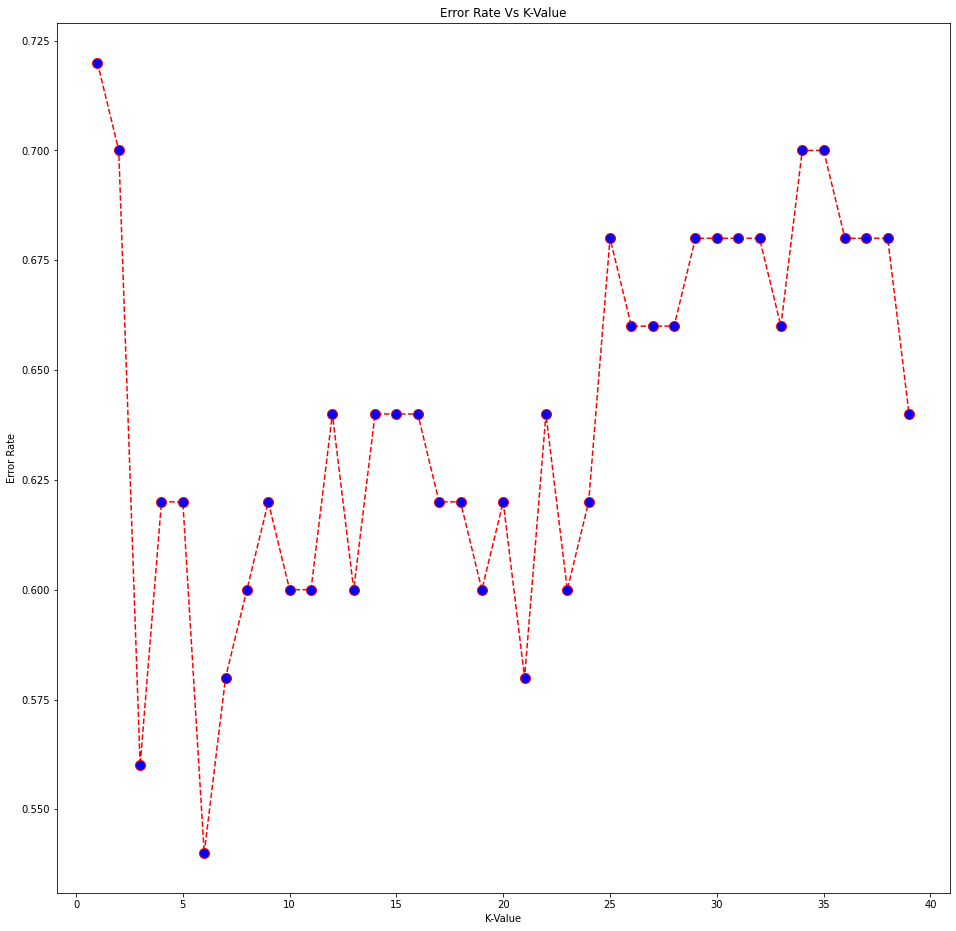

In [49]:
plt.figure(figsize = (16,16))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',
        markersize=10)
plt.title('Error Rate Vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

In [50]:
knn=KNeighborsClassifier(n_neighbors=6) 
knn.fit(x_train_knn,y_train)

KNeighborsClassifier(n_neighbors=6)

In [51]:
y_pred_knn_test=knn.predict(x_test_knn)

In [52]:
print(accuracy_score(y_test,y_pred_knn_test))

0.82


In [53]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train_knn,y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn_test=knn.predict(x_test_knn)

In [55]:
print(accuracy_score(y_test,y_pred_knn_test))

0.78
